A notebook for using spatial masks for subsetting inversion ready AEM files for rjmcmctdem

Neil Symington
neil.symington@ga.gov.au

In [33]:
import pandas as pd
import os
from shapely.geometry import LineString, Point
import aseg_gdf2

In [20]:
# Here we extract some AEM data for further inversion

# bring in a shapefile as a geometry

infile = r"C:\Users\PCUser\Desktop\NSC_data\data\AEM\HE\interpretation\dykes_AEM.shp"

from osgeo import ogr
file = ogr.Open(infile)
shape = file.GetLayer(0)
#first feature of the shapefile
feature = shape.GetFeature(1)

In [24]:
shapefile['geometry']['coordinates']

[[737596.7189334314, 8616995.982219212],
 [737338.4704182763, 8617871.582830079],
 [737500.062075695, 8618499.236189455],
 [736795.8801227398, 8619490.092260392],
 [736366.0904860562, 8620798.051977122],
 [735132.074302434, 8622868.459846316],
 [734415.8398837065, 8623927.416912898],
 [732756.2478623688, 8626885.126059178]]

In [39]:
import json
shapefile = json.loads(feature.ExportToJson())

# Buffer 200 m around line feature
dykeB = LineString(shapefile['geometry']['coordinates']).buffer(100.)

#from functools import partial
#import pyproj
#from shapely.ops import transform

#project = partial(
#    pyproj.transform,
#    pyproj.Proj(init='epsg:4283'), # source coordinate system
#    pyproj.Proj(init='epsg:28352')) # destination coordinate system

#Oolloo_extent = transform(project, Oolloo_extent)  # apply projection

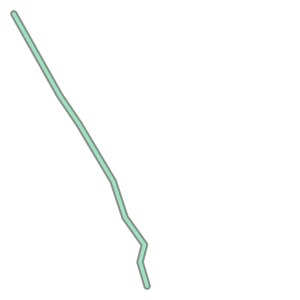

In [40]:
dykeB

In [41]:
infile = r"C:\Temp\HE_inversion_ready.dat"


gdf = aseg_gdf2.read(infile).df()

len(gdf)

159277

In [42]:
# Write those inside the polygon into the dyke b file

outfile = r"C:\Temp\HE_inversion_ready_dyke_b.dat"

#Iterate through an get the indices of those that fall within the Oolloo

idx = []

for index, row in gdf.iterrows():
    coords = row[['easting ', 'northing']].values
    
    if dykeB.contains(Point(coords)):
        idx.append(index)

In [43]:

with open(infile, 'r' ) as inf:
    with open(outfile, 'w') as outf:
        for i, line in enumerate(inf):
            if i in idx:
                outf.write(line)